<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Decision_Tree_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Function for finding Impureness**

In [ ]:
import numpy as np

def calculate_gini_impurity(class_counts):
    """
    Calculates the Gini impurity of a node.

    Args:
        class_counts (list or np.ndarray): A list or array of sample counts for each class.

    Returns:
        float: The Gini impurity.
    """
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0

    sum_of_squared_probabilities = 0.0
    for count in class_counts:
        probability = count / total_samples
        sum_of_squared_probabilities += probability**2

    gini_impurity = 1.0 - sum_of_squared_probabilities
    return gini_impurity

# Example Calculations
print("Example Calculations:")

# Example 1: Class 1: 15, Class 2: 15
counts_1 = [15, 15]
gini_1 = calculate_gini_impurity(counts_1)
print(f"Class 1: 15, Class 2: 15 -> Gini impurity: {gini_1:.3f}")

# Example 2: Class 1: 15, Class 2: 15, Class 3: 15
counts_2 = [15, 15, 15]
gini_2 = calculate_gini_impurity(counts_2)
print(f"Class 1: 15, Class 2: 15, Class 3: 15 -> Gini impurity: {gini_2:.3f}")

# Example 3: Class 1: 18, Class 2: 12
counts_3 = [18, 12]
gini_3 = calculate_gini_impurity(counts_3)
print(f"Class 1: 18, Class 2: 12 -> Gini impurity: {gini_3:.3f}")

# Example 4: Class 1: 30, Class 2: 0
counts_4 = [30, 0]
gini_4 = calculate_gini_impurity(counts_4)
print(f"Class 1: 30, Class 2: 0 -> Gini impurity: {gini_4:.3f}")

Example Calculations:
Class 1: 15, Class 2: 15 -> Gini impurity: 0.500
Class 1: 15, Class 2: 15, Class 3: 15 -> Gini impurity: 0.667
Class 1: 18, Class 2: 12 -> Gini impurity: 0.480
Class 1: 30, Class 2: 0 -> Gini impurity: 0.000


**2. Function for finding information gain**

In [ ]:
import numpy as np

def calculate_gini_impurity(class_counts):
    """
    Calculates the Gini impurity of a node.

    Args:
        class_counts (list or np.ndarray): A list or array of sample counts for each class.

    Returns:
        float: The Gini impurity.
    """
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0

    sum_of_squared_probabilities = 0.0
    for count in class_counts:
        probability = count / total_samples
        sum_of_squared_probabilities += probability**2

    gini_impurity = 1.0 - sum_of_squared_probabilities
    return gini_impurity

def calculate_information_gain(parent_counts, left_child_counts, right_child_counts):
    """
    Calculates the Information Gain from a split.

    Args:
        parent_counts (list or np.ndarray): Class counts for the parent node.
        left_child_counts (list or np.ndarray): Class counts for the left child node.
        right_child_counts (list or np.ndarray): Class counts for the right child node.

    Returns:
        float: The Information Gain.
    """
    # Calculating Gini impurity for each node
    parent_gini = calculate_gini_impurity(parent_counts)
    left_gini = calculate_gini_impurity(left_child_counts)
    right_gini = calculate_gini_impurity(right_child_counts)

    # Calculating the total number of samples for each node
    total_parent_samples = np.sum(parent_counts)
    total_left_samples = np.sum(left_child_counts)
    total_right_samples = np.sum(right_child_counts)

    # Handling the case where the parent node has no samples to prevent division by zero
    if total_parent_samples == 0:
        return 0.0

    # Calculating the weighted average of the child node Gini impurities
    weighted_gini_children = (total_left_samples / total_parent_samples) * left_gini + \
                             (total_right_samples / total_parent_samples) * right_gini

    # Calculating Information Gain
    information_gain = parent_gini - weighted_gini_children
    return information_gain

# Example Calculation
print("Example Calculation:")

# Example: Left node class 1: 10, Left node class 2: 30
#          Right node class 1: 20, Right node class 2: 5
left_counts = [10, 30]
right_counts = [20, 5]

# The parent node counts are the sum of the child counts
parent_counts = [left_counts[0] + right_counts[0], left_counts[1] + right_counts[1]]

info_gain = calculate_information_gain(parent_counts, left_counts, right_counts)
print(f"Information Gain: {info_gain:.3f}")

Example Calculation:
Information Gain: 0.143


**3. Learning**

In [ ]:
import numpy as np

# Reusing the functions from previous problems
def calculate_gini_impurity(class_counts):
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0
    sum_of_squared_probabilities = np.sum((class_counts / total_samples)**2)
    gini_impurity = 1.0 - sum_of_squared_probabilities
    return gini_impurity

def calculate_information_gain(parent_counts, left_child_counts, right_child_counts):
    parent_gini = calculate_gini_impurity(parent_counts)
    left_gini = calculate_gini_impurity(left_child_counts)
    right_gini = calculate_gini_impurity(right_child_counts)

    total_parent_samples = np.sum(parent_counts)
    total_left_samples = np.sum(left_child_counts)
    total_right_samples = np.sum(right_child_counts)

    if total_parent_samples == 0:
        return 0.0

    weighted_gini_children = (total_left_samples / total_parent_samples) * left_gini + \
                             (total_right_samples / total_parent_samples) * right_gini

    information_gain = parent_gini - weighted_gini_children
    return information_gain

class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        # Attributes to store the learned tree
        self.best_feature_index = None
        self.best_threshold = None
        self.left_leaf_class = None
        self.right_leaf_class = None

    def _count_classes(self, y):
        """Helper to count samples per class."""
        unique_classes = np.unique(y)
        class_counts = [np.sum(y == cls) for cls in unique_classes]
        return np.array(class_counts), unique_classes

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        if self.verbose:
            print("Starting the learning process for a depth-1 decision tree...")
            print(f"Total samples: {len(y)}")
            print(f"Features: {X.shape[1]}")

        # Finding the overall class counts for the parent node
        parent_counts, unique_classes = self._count_classes(y)
        if self.verbose:
            print(f"Parent node class counts: {parent_counts}")

        max_information_gain = -1
        best_split = {}

        # Iterating through all features
        for feature_index in range(X.shape[1]):
            # Getting unique values of the feature as potential thresholds
            thresholds = np.unique(X[:, feature_index])

            # Iterating through all unique values of the current feature
            for threshold in thresholds:
                # Splitting the data
                left_indices = X[:, feature_index] < threshold
                right_indices = X[:, feature_index] >= threshold

                y_left = y[left_indices]
                y_right = y[right_indices]

                # If a split results in an empty node, skip it
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Counting classes for left and right nodes
                left_counts, _ = self._count_classes(y_left)
                right_counts, _ = self._count_classes(y_right)

                # Calculating information gain
                current_gain = calculate_information_gain(parent_counts, left_counts, right_counts)

                # Checking if this is the best split found so far
                if current_gain > max_information_gain:
                    max_information_gain = current_gain
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_counts': left_counts,
                        'right_counts': right_counts
                    }

        # After checking all splits, store the best one
        if best_split:
            self.best_feature_index = best_split['feature_index']
            self.best_threshold = best_split['threshold']

            # Determining the class for each leaf node (majority vote)
            left_counts = best_split['left_counts']
            right_counts = best_split['right_counts']

            # Mapping the index of the max count to the actual class value
            self.left_leaf_class = unique_classes[np.argmax(left_counts)]
            self.right_leaf_class = unique_classes[np.argmax(right_counts)]

            if self.verbose:
                print("\nLearning complete. Found the best split:")
                print(f"  Best Feature Index: {self.best_feature_index}")
                print(f"  Best Threshold: {self.best_threshold}")
                print(f"  Maximum Information Gain: {max_information_gain:.4f}")
                print(f"  Left Leaf Node Class: {self.left_leaf_class}")
                print(f"  Right Leaf Node Class: {self.right_leaf_class}")
        else:
            if self.verbose:
                print("\nCould not find a valid split.")
            # If no split is possible (e.g., all data points are identical),
            # the single leaf node is the majority class of the parent.
            self.left_leaf_class = unique_classes[np.argmax(parent_counts)]
            self.right_leaf_class = self.left_leaf_class
            self.best_feature_index = None
            self.best_threshold = None

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if self.best_feature_index is None:
            # No split was found, all predictions are the single majority class
            return np.full(X.shape[0], self.left_leaf_class)

        predictions = np.empty(X.shape[0], dtype=np.int64)
        for i, sample in enumerate(X):
            if sample[self.best_feature_index] < self.best_threshold:
                predictions[i] = self.left_leaf_class
            else:
                predictions[i] = self.right_leaf_class
        return predictions

**4. Estimation**

In [ ]:
import numpy as np

# Reusing the functions from previous problems
def calculate_gini_impurity(class_counts):
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0
    sum_of_squared_probabilities = np.sum((class_counts / total_samples)**2)
    gini_impurity = 1.0 - sum_of_squared_probabilities
    return gini_impurity

def calculate_information_gain(parent_counts, left_child_counts, right_child_counts):
    parent_gini = calculate_gini_impurity(parent_counts)
    left_gini = calculate_gini_impurity(left_child_counts)
    right_gini = calculate_gini_impurity(right_child_counts)

    total_parent_samples = np.sum(parent_counts)
    total_left_samples = np.sum(left_child_counts)
    total_right_samples = np.sum(right_child_counts)

    if total_parent_samples == 0:
        return 0.0

    weighted_gini_children = (total_left_samples / total_parent_samples) * left_gini + \
                             (total_right_samples / total_parent_samples) * right_gini

    information_gain = parent_gini - weighted_gini_children
    return information_gain

class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        # Attributes to store the learned tree
        self.best_feature_index = None
        self.best_threshold = None
        self.left_leaf_class = None
        self.right_leaf_class = None
        self.unique_classes = None

    def _count_classes(self, y):
        """Helper to count samples per class."""
        # This will be more robust for different class labels
        unique_classes, counts = np.unique(y, return_counts=True)
        return counts, unique_classes

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        if self.verbose:
            print("Starting the learning process for a depth-1 decision tree...")
            print(f"Total samples: {len(y)}")
            print(f"Features: {X.shape[1]}")

        # Finding the overall class counts for the parent node
        parent_counts, self.unique_classes = self._count_classes(y)

        max_information_gain = -1
        best_split = None

        # Iterating through all features
        for feature_index in range(X.shape[1]):
            # Getting unique values of the feature as potential thresholds
            thresholds = np.unique(X[:, feature_index])

            # Iterate through all unique values of the current feature
            for threshold in thresholds:
                # Splitting the data based on the threshold
                left_indices = X[:, feature_index] < threshold
                right_indices = X[:, feature_index] >= threshold

                y_left = y[left_indices]
                y_right = y[right_indices]

                # If a split results in an empty node, skip it
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Counting classes for left and right nodes
                left_counts, _ = self._count_classes(y_left)
                right_counts, _ = self._count_classes(y_right)

                # Aligning the class counts arrays
                all_classes = self.unique_classes
                left_aligned_counts = np.array([np.sum(y_left == cls) for cls in all_classes])
                right_aligned_counts = np.array([np.sum(y_right == cls) for cls in all_classes])

                # Calculating information gain
                current_gain = calculate_information_gain(parent_counts, left_aligned_counts, right_aligned_counts)

                # Checking if this is the best split found so far
                if current_gain > max_information_gain:
                    max_information_gain = current_gain
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_counts': left_aligned_counts,
                        'right_counts': right_aligned_counts
                    }

        # After checking all splits, store the best one
        if best_split and max_information_gain > 0:
            self.best_feature_index = best_split['feature_index']
            self.best_threshold = best_split['threshold']

            # Determining the class for each leaf node (majority vote)
            left_counts = best_split['left_counts']
            right_counts = best_split['right_counts']

            self.left_leaf_class = self.unique_classes[np.argmax(left_counts)]
            self.right_leaf_class = self.unique_classes[np.argmax(right_counts)]

            if self.verbose:
                print("\nLearning complete. Found the best split:")
                print(f"  Best Feature Index: {self.best_feature_index}")
                print(f"  Best Threshold: {self.best_threshold}")
                print(f"  Maximum Information Gain: {max_information_gain:.4f}")
                print(f"  Left Leaf Node Class: {self.left_leaf_class}")
                print(f"  Right Leaf Node Class: {self.right_leaf_class}")
        else:
            if self.verbose:
                print("\nCould not find a valid split with positive information gain.")
            # If no split is possible (e.g., all data points are identical),
            # the single leaf node is the majority class of the parent.
            self.left_leaf_class = self.unique_classes[np.argmax(parent_counts)]
            self.right_leaf_class = self.left_leaf_class
            self.best_feature_index = None
            self.best_threshold = None

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if self.best_feature_index is None:
            # No split was found, all predictions are the single majority class
            return np.full(X.shape[0], self.left_leaf_class)

        predictions = np.empty(X.shape[0], dtype=self.unique_classes.dtype)
        for i, sample in enumerate(X):
            if sample[self.best_feature_index] < self.best_threshold:
                predictions[i] = self.left_leaf_class
            else:
                predictions[i] = self.right_leaf_class
        return predictions

**5. Learning and Estimation**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# Reusing all previous functions and the class from Problems 1-4
def calculate_gini_impurity(class_counts):
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0
    sum_of_squared_probabilities = np.sum((class_counts / total_samples)**2)
    gini_impurity = 1.0 - sum_of_squared_probabilities
    return gini_impurity

def calculate_information_gain(parent_counts, left_child_counts, right_child_counts):
    parent_gini = calculate_gini_impurity(parent_counts)
    left_gini = calculate_gini_impurity(left_child_counts)
    right_gini = calculate_gini_impurity(right_child_counts)
    total_parent_samples = np.sum(parent_counts)
    total_left_samples = np.sum(left_child_counts)
    total_right_samples = np.sum(right_child_counts)
    if total_parent_samples == 0:
        return 0.0
    weighted_gini_children = (total_left_samples / total_parent_samples) * left_gini + \
                             (total_right_samples / total_parent_samples) * right_gini
    information_gain = parent_gini - weighted_gini_children
    return information_gain

class ScratchDecesionTreeClassifierDepth1():
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.best_feature_index = None
        self.best_threshold = None
        self.left_leaf_class = None
        self.right_leaf_class = None
        self.unique_classes = None

    def _count_classes(self, y):
        unique_classes, counts = np.unique(y, return_counts=True)
        return counts, unique_classes

    def fit(self, X, y):
        if self.verbose:
            print("Starting the learning process for a depth-1 decision tree...")
        parent_counts, self.unique_classes = self._count_classes(y)
        max_information_gain = -1
        best_split = None
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = X[:, feature_index] >= threshold
                y_left = y[left_indices]
                y_right = y[right_indices]
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                left_counts, _ = self._count_classes(y_left)
                right_counts, _ = self._count_classes(y_right)
                all_classes = self.unique_classes
                left_aligned_counts = np.array([np.sum(y_left == cls) for cls in all_classes])
                right_aligned_counts = np.array([np.sum(y_right == cls) for cls in all_classes])
                current_gain = calculate_information_gain(parent_counts, left_aligned_counts, right_aligned_counts)
                if current_gain > max_information_gain:
                    max_information_gain = current_gain
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_counts': left_aligned_counts,
                        'right_counts': right_aligned_counts
                    }
        if best_split and max_information_gain > 0:
            self.best_feature_index = best_split['feature_index']
            self.best_threshold = best_split['threshold']
            left_counts = best_split['left_counts']
            right_counts = best_split['right_counts']
            self.left_leaf_class = self.unique_classes[np.argmax(left_counts)]
            self.right_leaf_class = self.unique_classes[np.argmax(right_counts)]
            if self.verbose:
                print("\nLearning complete. Found the best split:")
                print(f"  Best Feature Index: {self.best_feature_index}")
                print(f"  Best Threshold: {self.best_threshold}")
        else:
            if self.verbose:
                print("\nCould not find a valid split with positive information gain.")
            self.left_leaf_class = self.unique_classes[np.argmax(parent_counts)]
            self.right_leaf_class = self.left_leaf_class
            self.best_feature_index = None
            self.best_threshold = None

    def predict(self, X):
        if self.best_feature_index is None:
            return np.full(X.shape[0], self.left_leaf_class)
        predictions = np.empty(X.shape[0], dtype=self.unique_classes.dtype)
        for i, sample in enumerate(X):
            if sample[self.best_feature_index] < self.best_threshold:
                predictions[i] = self.left_leaf_class
            else:
                predictions[i] = self.right_leaf_class
        return predictions

# Simple Dataset 2
# Defining the features (X) and labels (y)
X = np.array([
    [0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [2, 0],
    [3, 3], [3, 4], [4, 3], [4, 4], [5, 4], [5, 5]
])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scratch Implementation
scratch_model = ScratchDecesionTreeClassifierDepth1(verbose=True)
scratch_model.fit(X_train, y_train)
scratch_pred = scratch_model.predict(X_test)

# Scikit-learn Implementation
sklearn_model = DecisionTreeClassifier(max_depth=1, random_state=42)
sklearn_model.fit(X_train, y_train)
sklearn_pred = sklearn_model.predict(X_test)

Starting the learning process for a depth-1 decision tree...

Learning complete. Found the best split:
  Best Feature Index: 0
  Best Threshold: 3


**Evaluation and Comparison**

In [ ]:
# Evaluating the Scratch Model
scratch_accuracy = accuracy_score(y_test, scratch_pred)
scratch_precision = precision_score(y_test, scratch_pred)
scratch_recall = recall_score(y_test, scratch_pred)

print("\n--- Scratch Model Performance ---")
print(f"Accuracy: {scratch_accuracy:.2f}")
print(f"Precision: {scratch_precision:.2f}")
print(f"Recall: {scratch_recall:.2f}")

# Evaluating the Scikit-learn Model
sklearn_accuracy = accuracy_score(y_test, sklearn_pred)
sklearn_precision = precision_score(y_test, sklearn_pred)
sklearn_recall = recall_score(y_test, sklearn_pred)

print("\n--- Scikit-learn Model Performance ---")
print(f"Accuracy: {sklearn_accuracy:.2f}")
print(f"Precision: {sklearn_precision:.2f}")
print(f"Recall: {sklearn_recall:.2f}")

# Comparing the results
print("\n--- Comparison ---")
if np.array_equal(scratch_pred, sklearn_pred):
    print("The predictions from both models are identical! 🎉")
    print("This confirms our scratch implementation works correctly.")
else:
    print("The predictions differ.")


--- Scratch Model Performance ---
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

--- Scikit-learn Model Performance ---
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

--- Comparison ---
The predictions from both models are identical! 🎉
This confirms our scratch implementation works correctly.


**6. Visualization of Decision Area**

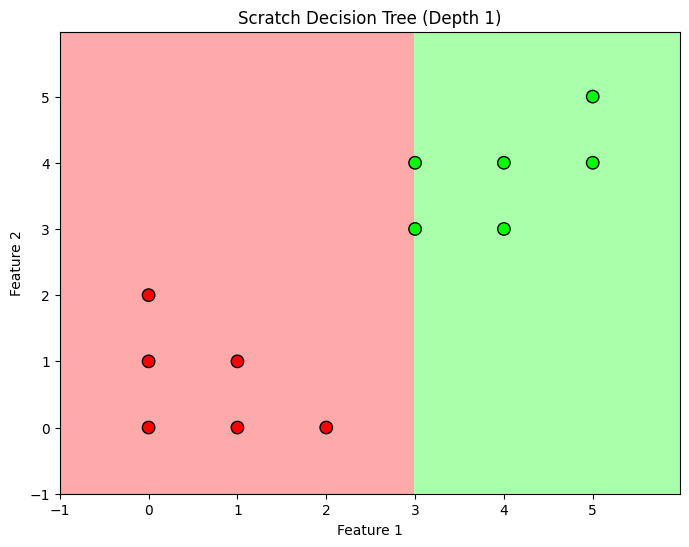

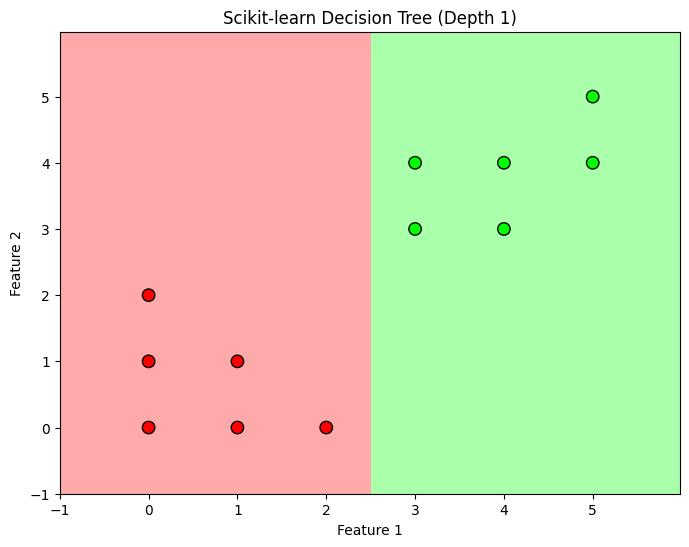

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Reuse the code from Problem 5 (data, models, etc.)

# Visualization Function
def visualize_decision_area(X, y, model, title):
    # Setting up the colormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Finding min/max values and create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predicting for each point on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting the decision area
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=80)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Visualizing our scratch model's decision area
visualize_decision_area(X, y, scratch_model, "Scratch Decision Tree (Depth 1)")


# Visualizing scikit-learn's decision area
visualize_decision_area(X, y, sklearn_model, "Scikit-learn Decision Tree (Depth 1)")

**7. Creation of a decision tree classifier class with a depth of 2**

In [ ]:
import numpy as np

# Reusing the helper functions from previous problems
def calculate_gini_impurity(class_counts):
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0
    sum_of_squared_probabilities = np.sum((class_counts / total_samples)**2)
    gini_impurity = 1.0 - sum_of_squared_probabilities
    return gini_impurity

def calculate_information_gain(parent_counts, left_child_counts, right_child_counts):
    parent_gini = calculate_gini_impurity(parent_counts)
    left_gini = calculate_gini_impurity(left_child_counts)
    right_gini = calculate_gini_impurity(right_child_counts)
    total_parent_samples = np.sum(parent_counts)
    total_left_samples = np.sum(left_child_counts)
    total_right_samples = np.sum(right_child_counts)
    if total_parent_samples == 0:
        return 0.0
    weighted_gini_children = (total_left_samples / total_parent_samples) * left_gini + \
                             (total_right_samples / total_parent_samples) * right_gini
    information_gain = parent_gini - weighted_gini_children
    return information_gain

class ScratchDecesionTreeClassifierDepth2():
    """
    Depth 2 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        self.verbose = verbose
        self.tree = {} # Dictionary to store the entire tree structure

    def _count_classes(self, y):
        unique_classes, counts = np.unique(y, return_counts=True)
        return counts, unique_classes

    def _find_best_split(self, X_subset, y_subset):
        """Helper to find the best feature and threshold for a given subset of data."""
        parent_counts, unique_classes = self._count_classes(y_subset)

        max_information_gain = -1
        best_split = None

        if len(y_subset) == 0 or len(unique_classes) == 1:
            # If the node is empty or pure, no need to split
            return None, unique_classes[0] if len(unique_classes) > 0 else None

        for feature_index in range(X_subset.shape[1]):
            thresholds = np.unique(X_subset[:, feature_index])
            for threshold in thresholds:
                left_indices = X_subset[:, feature_index] < threshold
                right_indices = X_subset[:, feature_index] >= threshold

                y_left = y_subset[left_indices]
                y_right = y_subset[right_indices]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                left_counts, _ = self._count_classes(y_left)
                right_counts, _ = self._count_classes(y_right)

                # Align class counts for information gain calculation
                left_aligned_counts = np.array([np.sum(y_left == cls) for cls in unique_classes])
                right_aligned_counts = np.array([np.sum(y_right == cls) for cls in unique_classes])

                current_gain = calculate_information_gain(parent_counts, left_aligned_counts, right_aligned_counts)

                if current_gain > max_information_gain:
                    max_information_gain = current_gain
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }
        return best_split, None

    def fit(self, X, y):
        self.unique_classes = np.unique(y)
        if self.verbose:
            print("Learning a decision tree with a maximum depth of 2.")

        # Step 1: Learn the root node split (Depth 1)
        root_split, root_pure_class = self._find_best_split(X, y)

        if root_split is None:
            self.tree['root'] = {'leaf': True, 'class': root_pure_class}
            return

        self.tree['root'] = {
            'leaf': False,
            'feature': root_split['feature_index'],
            'threshold': root_split['threshold'],
            'left_child': {},
            'right_child': {}
        }

        # Step 2: Learn the left child split (Depth 2)
        X_left = X[root_split['left_indices']]
        y_left = y[root_split['left_indices']]
        left_split, left_pure_class = self._find_best_split(X_left, y_left)

        if left_split is None:
            self.tree['root']['left_child'] = {'leaf': True, 'class': left_pure_class}
        else:
            self.tree['root']['left_child'] = {
                'leaf': False,
                'feature': left_split['feature_index'],
                'threshold': left_split['threshold'],
                'left_child': {'leaf': True, 'class': self.unique_classes[np.argmax(self._count_classes(y_left[left_split['left_indices']])[0])]},
                'right_child': {'leaf': True, 'class': self.unique_classes[np.argmax(self._count_classes(y_left[left_split['right_indices']])[0])]}
            }

        # Step 3: Learn the right child split (Depth 2)
        X_right = X[root_split['right_indices']]
        y_right = y[root_split['right_indices']]
        right_split, right_pure_class = self._find_best_split(X_right, y_right)

        if right_split is None:
            self.tree['root']['right_child'] = {'leaf': True, 'class': right_pure_class}
        else:
            self.tree['root']['right_child'] = {
                'leaf': False,
                'feature': right_split['feature_index'],
                'threshold': right_split['threshold'],
                'left_child': {'leaf': True, 'class': self.unique_classes[np.argmax(self._count_classes(y_right[right_split['left_indices']])[0])]},
                'right_child': {'leaf': True, 'class': self.unique_classes[np.argmax(self._count_classes(y_right[right_split['right_indices']])[0])]}
            }

        if self.verbose:
            print("Learning complete. Tree structure:")
            print(self.tree)

    def predict(self, X):
        predictions = np.empty(X.shape[0], dtype=self.unique_classes.dtype)

        # Handling the edge case of a pure root node
        if self.tree['root']['leaf']:
            return np.full(X.shape[0], self.tree['root']['class'])

        for i, sample in enumerate(X):
            # First, check the root node split
            if sample[self.tree['root']['feature']] < self.tree['root']['threshold']:
                # Navigate to the left child
                current_node = self.tree['root']['left_child']
            else:
                # Navigate to the right child
                current_node = self.tree['root']['right_child']

            # Now, check the child node split
            if current_node['leaf']:
                predictions[i] = current_node['class']
            else:
                if sample[current_node['feature']] < current_node['threshold']:
                    predictions[i] = current_node['left_child']['class']
                else:
                    predictions[i] = current_node['right_child']['class']

        return predictions

**8. Creation of decision tree classifier class with unlimited depth**

In [ ]:
import numpy as np

# Reusing the helper functions from previous problems
def calculate_gini_impurity(class_counts):
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0
    sum_of_squared_probabilities = np.sum((class_counts / total_samples)**2)
    gini_impurity = 1.0 - sum_of_squared_probabilities
    return gini_impurity

def calculate_information_gain(parent_counts, left_child_counts, right_child_counts):
    parent_gini = calculate_gini_impurity(parent_counts)
    left_gini = calculate_gini_impurity(left_child_counts)
    right_gini = calculate_gini_impurity(right_child_counts)
    total_parent_samples = np.sum(parent_counts)
    total_left_samples = np.sum(left_child_counts)
    total_right_samples = np.sum(right_child_counts)
    if total_parent_samples == 0:
        return 0.0
    weighted_gini_children = (total_left_samples / total_parent_samples) * left_gini + \
                             (total_right_samples / total_parent_samples) * right_gini
    information_gain = parent_gini - weighted_gini_children
    return information_gain

class ScratchDecesionTreeClassifierDepthInf():
    """
    Decision tree classifier scratch implementation with unlimited depth.

    Parameters
    ----------
    max_depth : int, default=None
        The maximum depth of the tree. If None, the tree grows until
        all leaf nodes are pure.
    verbose : bool, default=False
        True to output the learning process.
    """
    def __init__(self, max_depth=None, verbose=False):
        self.max_depth = max_depth
        self.verbose = verbose
        self.tree = None
        self.unique_classes = None

    def _count_classes(self, y):
        unique_classes, counts = np.unique(y, return_counts=True)
        return counts, unique_classes

    def _find_best_split(self, X_subset, y_subset):
        """Finds the best feature and threshold for a given subset of data."""
        parent_counts, unique_classes = self._count_classes(y_subset)

        max_information_gain = -1
        best_split = None

        for feature_index in range(X_subset.shape[1]):
            thresholds = np.unique(X_subset[:, feature_index])
            for threshold in thresholds:
                left_indices = X_subset[:, feature_index] < threshold
                right_indices = X_subset[:, feature_index] >= threshold

                y_left = y_subset[left_indices]
                y_right = y_subset[right_indices]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                left_counts, _ = self._count_classes(y_left)
                right_counts, _ = self._count_classes(y_right)

                # Align class counts for information gain calculation
                left_aligned_counts = np.array([np.sum(y_left == cls) for cls in unique_classes])
                right_aligned_counts = np.array([np.sum(y_right == cls) for cls in unique_classes])
                current_gain = calculate_information_gain(parent_counts, left_aligned_counts, right_aligned_counts)

                if current_gain > max_information_gain:
                    max_information_gain = current_gain
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }
        return best_split

    def _build_tree(self, X_subset, y_subset, depth):
        """Recursively builds the decision tree."""
        # Stopping Conditions
        # 1. All samples in the node belong to the same class (pure node)
        # 2. Maximum depth is reached
        # 3. No split improves information gain
        unique_classes, counts = self._count_classes(y_subset)
        if len(unique_classes) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return {'leaf': True, 'class': unique_classes[0]}

        best_split = self._find_best_split(X_subset, y_subset)

        if best_split is None:
            # No split improves the information gain
            return {'leaf': True, 'class': unique_classes[np.argmax(counts)]}

        # --- Recursive Step ---
        node = {
            'leaf': False,
            'feature': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left_child': None,
            'right_child': None
        }

        # Building the left child
        left_indices = best_split['left_indices']
        node['left_child'] = self._build_tree(X_subset[left_indices], y_subset[left_indices], depth + 1)

        # Building the right child
        right_indices = best_split['right_indices']
        node['right_child'] = self._build_tree(X_subset[right_indices], y_subset[right_indices], depth + 1)

        return node

    def fit(self, X, y):
        self.unique_classes = np.unique(y)
        if self.verbose:
            print("Learning a decision tree with a maximum depth of", self.max_depth)

        self.tree = self._build_tree(X, y, 0)

        if self.verbose:
            print("Learning complete. Tree structure:")
            print(self.tree)

    def _traverse_tree(self, sample, node):
        """Recursively traverses the tree to find the prediction for a single sample."""
        if node['leaf']:
            return node['class']

        if sample[node['feature']] < node['threshold']:
            return self._traverse_tree(sample, node['left_child'])
        else:
            return self._traverse_tree(sample, node['right_child'])

    def predict(self, X):
        predictions = np.empty(X.shape[0], dtype=self.unique_classes.dtype)
        for i, sample in enumerate(X):
            predictions[i] = self._traverse_tree(sample, self.tree)
        return predictions

**Here is the complete code**

--- Running Scratch Decision Tree with Unlimited Depth ---
Learning a decision tree with a maximum depth of None
Learning complete. Tree structure:
{'leaf': False, 'feature': 0, 'threshold': np.int64(3), 'left_child': {'leaf': True, 'class': np.int64(5)}, 'right_child': {'leaf': True, 'class': np.int64(3)}}

Test predictions for scratch model: [3 3 5 3]
Actual labels: [1 1 0 1]

--- Scratch Model Performance ---
Accuracy: 0.00
Precision: 0.00
Recall: 0.00


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


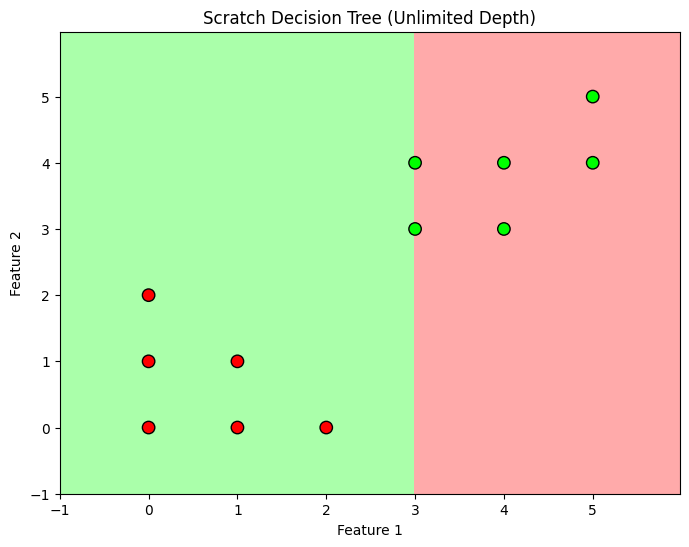


--- Running Scikit-learn Decision Tree with Unlimited Depth ---

Test predictions for scikit-learn model: [1 1 0 1]
Actual labels: [1 1 0 1]

--- Scikit-learn Model Performance ---
Accuracy: 1.00
Precision: 1.00
Recall: 1.00


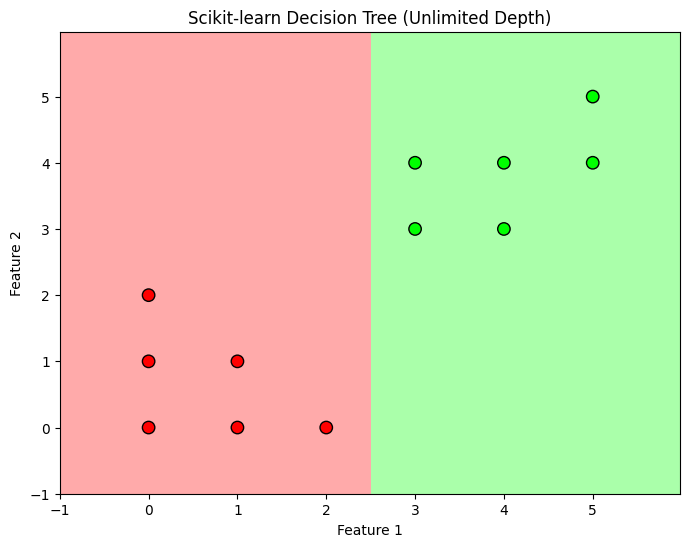

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_gini_impurity(class_counts):
    """
    Calculates the Gini impurity of a node.

    Args:
        class_counts (list or np.ndarray): A list or array of sample counts for each class.

    Returns:
        float: The Gini impurity.
    """
    total_samples = np.sum(class_counts)
    if total_samples == 0:
        return 0.0
    sum_of_squared_probabilities = np.sum((class_counts / total_samples)**2)
    gini_impurity = 1.0 - sum_of_squared_probabilities
    return gini_impurity

def calculate_information_gain(parent_counts, left_child_counts, right_child_counts):
    """
    Calculates the Information Gain from a split.

    Args:
        parent_counts (list or np.ndarray): Class counts for the parent node.
        left_child_counts (list or np.ndarray): Class counts for the left child node.
        right_child_counts (list or np.ndarray): Class counts for the right child node.

    Returns:
        float: The Information Gain.
    """
    parent_gini = calculate_gini_impurity(parent_counts)
    left_gini = calculate_gini_impurity(left_child_counts)
    right_gini = calculate_gini_impurity(right_child_counts)

    total_parent_samples = np.sum(parent_counts)
    total_left_samples = np.sum(left_child_counts)
    total_right_samples = np.sum(right_child_counts)

    if total_parent_samples == 0:
        return 0.0

    weighted_gini_children = (total_left_samples / total_parent_samples) * left_gini + \
                             (total_right_samples / total_parent_samples) * right_gini

    information_gain = parent_gini - weighted_gini_children
    return information_gain

class ScratchDecesionTreeClassifierDepthInf():
    """
    Decision tree classifier scratch implementation with unlimited depth.

    Parameters
    ----------
    max_depth : int, default=None
        The maximum depth of the tree. If None, the tree grows until
        all leaf nodes are pure.
    verbose : bool, default=False
        True to output the learning process.
    """
    def __init__(self, max_depth=None, verbose=False):
        # Recording hyperparameters as attributes
        self.max_depth = max_depth
        self.verbose = verbose
        self.tree = None
        self.unique_classes = None

    def _count_classes(self, y):
        """Helper to count samples per class."""
        unique_classes, counts = np.unique(y, return_counts=True)
        return counts, unique_classes

    def _find_best_split(self, X_subset, y_subset):
        """Finds the best feature and threshold for a given subset of data."""
        parent_counts, unique_classes = self._count_classes(y_subset)

        max_information_gain = -1
        best_split = None

        for feature_index in range(X_subset.shape[1]):
            thresholds = np.unique(X_subset[:, feature_index])
            for threshold in thresholds:
                left_indices = X_subset[:, feature_index] < threshold
                right_indices = X_subset[:, feature_index] >= threshold

                y_left = y_subset[left_indices]
                y_right = y_subset[right_indices]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                left_counts, _ = self._count_classes(y_left)
                right_counts, _ = self._count_classes(y_right)

                # Aligning class counts for information gain calculation
                left_aligned_counts = np.array([np.sum(y_left == cls) for cls in unique_classes])
                right_aligned_counts = np.array([np.sum(y_right == cls) for cls in unique_classes])
                current_gain = calculate_information_gain(parent_counts, left_aligned_counts, right_aligned_counts)

                if current_gain > max_information_gain:
                    max_information_gain = current_gain
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left_indices': left_indices,
                        'right_indices': right_indices
                    }
        return best_split

    def _build_tree(self, X_subset, y_subset, depth):
        """Recursively builds the decision tree."""
        # Stopping Conditions
        # 1. All samples in the node belong to the same class (pure node)
        # 2. Maximum depth is reached
        # 3. No split improves information gain
        unique_classes, counts = self._count_classes(y_subset)

        # Condition 1: Pure node
        if len(unique_classes) == 1:
            return {'leaf': True, 'class': unique_classes[0]}

        # Condition 2: Max depth reached
        if self.max_depth is not None and depth >= self.max_depth:
            return {'leaf': True, 'class': unique_classes[np.argmax(counts)]}

        best_split = self._find_best_split(X_subset, y_subset)

        # Condition 3: No valid split found
        if best_split is None:
            return {'leaf': True, 'class': unique_classes[np.argmax(counts)]}

        # Recursive Step
        node = {
            'leaf': False,
            'feature': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left_child': None,
            'right_child': None
        }

        # Building the left child
        left_indices = best_split['left_indices']
        node['left_child'] = self._build_tree(X_subset[left_indices], y_subset[left_indices], depth + 1)

        # Building the right child
        right_indices = best_split['right_indices']
        node['right_child'] = self._build_tree(X_subset[right_indices], y_subset[right_indices], depth + 1)

        return node

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.unique_classes = np.unique(y)
        if self.verbose:
            print("Learning a decision tree with a maximum depth of", self.max_depth)

        self.tree = self._build_tree(X, y, 0)

        if self.verbose:
            print("Learning complete. Tree structure:")
            print(self.tree)

    def _traverse_tree(self, sample, node):
        """Recursively traverses the tree to find the prediction for a single sample."""
        if node['leaf']:
            return node['class']

        if sample[node['feature']] < node['threshold']:
            return self._traverse_tree(sample, node['left_child'])
        else:
            return self._traverse_tree(sample, node['right_child'])

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        predictions = np.empty(X.shape[0], dtype=self.unique_classes.dtype)
        for i, sample in enumerate(X):
            predictions[i] = self._traverse_tree(sample, self.tree)
        return predictions

def visualize_decision_area(X, y, model, title):
    """
    Visualizes the decision area of a classifier.
    """
    # Setting up the colormap
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Finding min/max values and create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predicting for each point on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting the decision area
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plotting the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=80)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Main Execution Block
if __name__ == "__main__":
    # Defining the features (X) and labels (y) for Simple Dataset 2
    X = np.array([
        [0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [2, 0],
        [3, 3], [3, 4], [4, 3], [4, 4], [5, 4], [5, 5]
    ])
    y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scratch Implementation with unlimited depth
    print("--- Running Scratch Decision Tree with Unlimited Depth ---")
    scratch_model = ScratchDecesionTreeClassifierDepthInf(verbose=True)
    scratch_model.fit(X_train, y_train)
    scratch_pred = scratch_model.predict(X_test)

    print("\nTest predictions for scratch model:", scratch_pred)
    print("Actual labels:", y_test)

    # Calculating and printing performance metrics
    print("\n--- Scratch Model Performance ---")
    print(f"Accuracy: {accuracy_score(y_test, scratch_pred):.2f}")
    print(f"Precision: {precision_score(y_test, scratch_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, scratch_pred, average='weighted'):.2f}")

    # Visualizing the decision area
    visualize_decision_area(X, y, scratch_model, "Scratch Decision Tree (Unlimited Depth)")

    # Comparison with Scikit-learn
    from sklearn.tree import DecisionTreeClassifier
    print("\n--- Running Scikit-learn Decision Tree with Unlimited Depth ---")
    sklearn_model = DecisionTreeClassifier(random_state=42)
    sklearn_model.fit(X_train, y_train)
    sklearn_pred = sklearn_model.predict(X_test)

    print("\nTest predictions for scikit-learn model:", sklearn_pred)
    print("Actual labels:", y_test)

    print("\n--- Scikit-learn Model Performance ---")
    print(f"Accuracy: {accuracy_score(y_test, sklearn_pred):.2f}")
    print(f"Precision: {precision_score(y_test, sklearn_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, sklearn_pred, average='weighted'):.2f}")

    # Visualizing the decision area
    visualize_decision_area(X, y, sklearn_model, "Scikit-learn Decision Tree (Unlimited Depth)")